<a id='Top' /a>
# Class08
## Learning Objectives
* [Numpy](#Numpy)
* [Plotting Data with Matplotlib](#Matplotlib)
* [Different types of plots](#types)
* [Martian Challenge: Terminal Velocity](#Terminal)

<a id='Numpy' /a>
## Numpy
[Top of Notebook](#Top)

Before we learn how to plot data, it is essential to learn about numpy, the module that is synonymous with numerical processing in python.

You are now familiar with lists, tuples, and dictionaries. None of these data structures, however, is particularly efficient for large amounts of numerical data.  It is far better to store these numbers in numerical arrays.  The Numpy library provides lots of ways to create and manipuate arrays of numbers. 

To see why Numpy is so important, let's step back and work with a familiar data structure, the list. Suppose we have a long list of numbers and we want to square each one. I don't know why, just go with me here. (Example from *Learning Pandas* by Michael Heydt)

In [1]:
# Create a function to square all values in a list
# First create and empty list to hold the result, then loop over the list of numbers to be squared,
# squard each one, and add it to the list holding the results.
def squares(values):
    result = []
    for v in values:
        result.append(v * v)
    return result

# Test our function with a simple case
test = [1, 2, 3, 4]
test_squared = squares(test)
print(test_squared)

[1, 4, 9, 16]


That did what we expected. Okay now let's try it on a really long list of numbers. We'll also time it to see how long it takes.

In [4]:
# Create a list of 100,000 numbers with the python range() function
to_square = range(100000)

# Time how long it takes to square all the elements in the list
%timeit squares(to_square)

100 loops, best of 3: 13.7 ms per loop


It took a little over 10 milliseconds.  A millisecond is a thousandth of a second, so that seems pretty fast, but it is acually slow for computers. Note that the %timeit command is a "magic" function.  It executes the command multiple times and reports and average. If you code is slow you can used timeit to test various portions to find the pokey bits.

Now let's try the same thing, but this time we'll use numpy arrays.

In [7]:
import numpy as np
test = np.array([1, 2, 3, 4])
type(test)

numpy.ndarray

In [10]:
# With arrays we can just square the whole array and every element will be squared
test_squared = test**2
print(test)

[1 2 3 4]


Okay, that worked, and we didn't have to write a function. But how about speed?

In [11]:
# Create an array of sequential numbers from 0 to 99,999 using the numpy arange method.
array_to_square = np.arange(0, 100000)
%timeit array_to_square**2

10000 loops, best of 3: 90.6 µs per loop


Notice that performing this task with lists took more than 10 milliseconds, but with arrays it took less than 90 microseconds. A millisecond is a thousandth of a second. A microsecond is a millionth of a second, a factor of 1000 different. Yes, both are fast, but in a long program with lots of operations the difference in speed quickly adds up. You might not care if your program runs in a millisecond or a microsecond, but as programs grow there will be many such operattions.  How do you feel about waiting 1 minute vs 1000 minutes (almost 17 hrs)?

One of the reasons numpy arrays are so fast because they "vectorize" operantions, meaning they automatically perform them on a entire arrays. Suppose I gave you two lists of numbers [1, 2, 3, 4, 5] and [11, 12, 13, 14, 15] and I told you to add them together to get [12 14 16 18 20].

You solution would normally requiring looping over all of the elements. But look at how easy it is using Numpy.

In [12]:
import numpy as np

# Create the arrays
a = np.array([1, 2, 3, 4, 5])
b = np.array([11, 12, 13, 14, 15])

# Just add them like ordinary numbers
c = a + b
print(c)

[12 14 16 18 20]


Unlike a python list, all of the elements in an array have to be the same type of data, and that is the main reason they can be processed more quickly. Python doesn't have to stop at each element in a list to figure out whether it is an integer, a float, a string, another list, etc. 

We will be plotting arrrays of data.

**Student challenge:** Create two numpy arrays of the same length and try multiplying them together and printing the result.

<a id='Matplotlib' /a>
## Plotting Data with Matplotlib
[Top of Notebook](#Top)

Computers faciltate working with vast amounts of data. Presenting that data in easily assimilable form requires graphs and summary statistics. Because the Python language is an open-source project with thousands, if not tens of thousands, of active developers, there are at least a dozen different modules available for data visualization. We will focus on just one: matplotlib (http://matplotlib.org/). Matplotlib is probably the de facto standard plotting library for Python, and despite its long history it is still actively mantained by developers, with new features being added continually.

Matplotlib gets it's name from Matlab, which is a commerical data analysis package extremely popular with scientists and engineers (Temple has a site license) that has an integrated graphics system. John Hunter, a long-time user of matlab, but disenchanted with commercial scientific software, started development on matplotlib in the early 2000's. He modeled the resulting python graphics library on the plot commands used in matlab, in part to make it easy for practicing scientists to switch from matlab to python with having to relearn everything.

Matplotlib is the most widely used plotting package in the python ecosystem. For a notion of it's full capabilities take a look at the plots and sample code in the matplotlib gallery: http://matplotlib.org/gallery.html.

## Pyplot
Matplotlib is so big it is organized into submodules. Most of the time the submodule you'll need is pyplot.  Let's look as some simple examples. Most of what follows comes from the [official Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html).

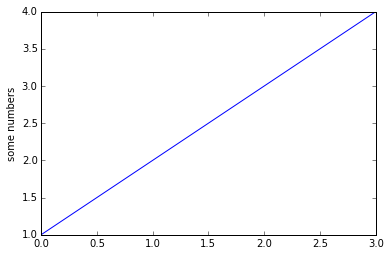

In [17]:
# First issue the magic command to tell Jupyter to plot inside the notebook. This is important!
% matplotlib inline

import matplotlib.pyplot as plt
ax = plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

The basic approach is to issue a series of pyplot commands that build the plot and then call show() to display the result. Although in Jupyter notebooks you can often omit the plt.show() and it is inferred when you execute the cell.

To plot x vs. y you can pass two lists of numbers or two numpy arrays.

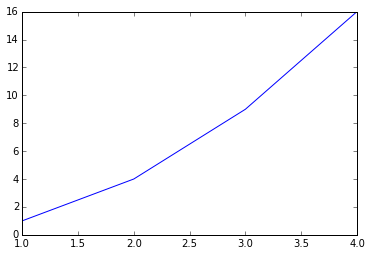

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

For every x, y pair of arguments, there is an optional third argument that is the format string that indicates the color and line type of the plot. The letters and symbols of the format string follow the MATLAB plotting convention. You concatenate a color string with a line style string. The default format string is ‘b-‘, which is 'b' for blue and '-' for line, so 'b-' means draw a blue line between the points. 

For example, to plot the same data with no connecting line but with red circles to mark the points, you would do it this way.

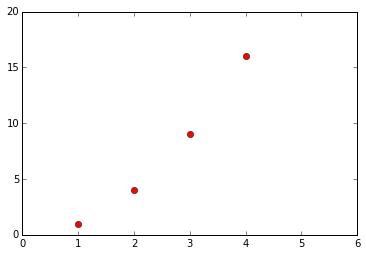

In [6]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

**Student Challenge:** Try plotting with the string 'ro-' and see what happens.

Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8]


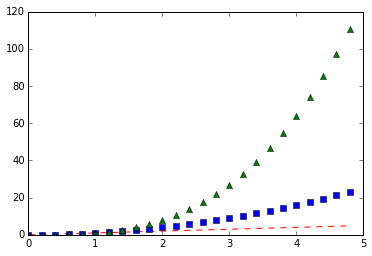

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled between 0 and 5 in steps of 0.2
t = np.arange(0., 5., 0.2)
print(t)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

There are many optional arguments, such as commands to control the linewidth. See the above mentioned tutorial for a full list.

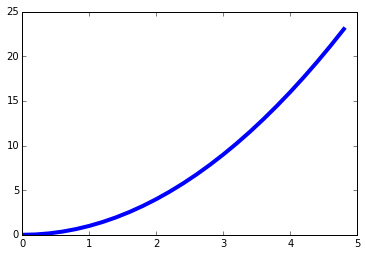

In [19]:
plt.plot(t, t**2, linewidth=4.0)
plt.show()

## Multiple graphs in a figure
Below is a script to create two subplots. The functions being plotted are:
$$f(t) = e^{-t}cos(2\pi t)$$
$$f(t) = cos(2\pi t)$$
Just because they make a pretty plot. Don't worry about the math.

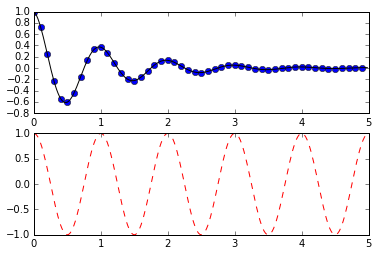

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

What did this do? We created a figure, then issued a subplot command.

subplot(2,1,1) means there are:
two rows, one column and this is the 1st plot

plt.subplot(2,1,2) means there are:
two rows, one column and this is the 2nd plot

See the difference if we do it this way?

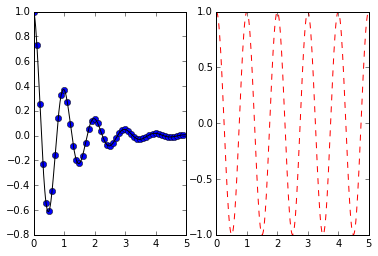

In [22]:
plt.figure(1)

# One row, two columns, 1st plot
plt.subplot(1,2,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# One row, two columns, 2nd plot
plt.subplot(1,2,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Labels
It is easy to label the axis and give the plot a title. Here we plot $ y = x^2$ for x from 0 to 10 in steps of 0.1

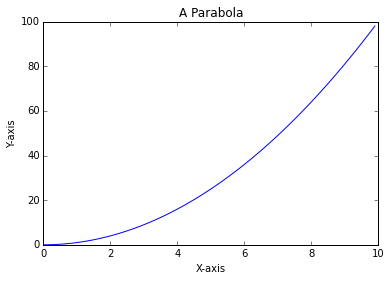

In [23]:
import numpy as np
x = np.arange(0, 10, .1)
y = x * x
plt.plot(x,y)
plt.xlabel('X-axis') 
plt.ylabel('Y-axis')
plt.title ('A Parabola')
plt.show()

<a id='types' /a>
## Different types of plots
[Top of notebook](#Top)

Matplotlib do more than plot simple x-y line and scatter plots.  Frankly, I can never keep all the different plots in my brain, so I just look in the [matplotlib gallery](http://matplotlib.org/gallery.html), find an example close to what I want to do and modify the code.

These examples show lots of matplotlib features. Don't try to learn them all, just notice what is possible.

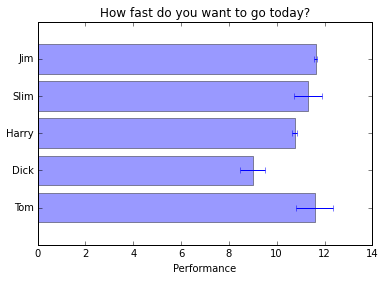

In [24]:
"""
Simple demo of a horizontal bar chart.
"""
import matplotlib.pyplot as plt
import numpy as np

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()



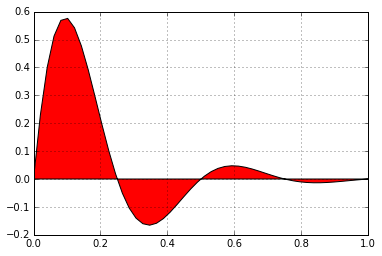

In [25]:
"""
Simple demo of the fill function.
"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'r')
plt.grid(True)
plt.show()

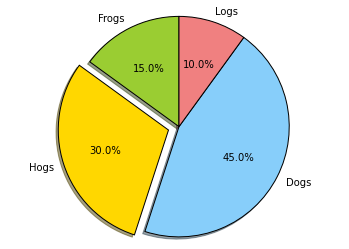

In [27]:
"""
Exploded Pie Chart
"""
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

**Student Challenge:** See if you can duplicate one of the other examples from the matplotlib gallery here.

<a id='Terminal' /a>
## Martian Challenge: Terminal Velocity
[Top of notebook](#Top)



### Terminal Velocity
If you jumped from an airplane on Earth you would fall ever faster as you accelerated under Earth's gravity, but because the amount of drag created by our atmosphere increases with velocity, the faster you fall the more the air drag resists further acceleration. Notice from the equation below that the force of drag actually increases with the *square* of velocity, so double the velocity and you get four times the drag.  Triple the velocity and you get nine times the drag.  This is why aerodynamic design is so important for fast moving vehicles such as cars and airplanes, but no big deal for travel in outer space where there is no atmosphere. (Spaceships don't have to be pointy.)

As you fall faster and faster the force of gravity stays the same but drag rapidly increases until gravity and drag eventually balance and the net force would be zero. Your velocity no longer increase.  You will continue to fall at a constant rate known as the "terminal velocity," which it would be, indeed, if your parachute didn't open. The parachute increases the drag, lowering the terminal velocity to something your body can handle.

![Terminal Velocity](http://tap.iop.org/mechanics/drag/209/img_full_46359.gif)

### Is your terminal velocity higher on Earth or on Mars?
Earth has a stronger gravity, so the force of accelation is greater, but Earth also has a thicker atmosphere, hence greater drag. It is not intuitively obvious whether your terminal velocity is higher on Earth or on Mars, but it is important because NASA uses parachutes to land materials on the Martian surface, and this was discussed in the initial planning to send extra food supplies to Whatney. Unfortunately, that rocket launch failed.

![Martian Parachute](http://mars.nasa.gov/mer/mission/images/parachute2_medium.jpg)

So let's see if we can answer the question!

#### What would you weigh on mars?
What we call your "weight" is just the force of gravity acting on you. As you probably remember from high school, F=ma, or force equals mass times acceleration.  On the surface of the Earth the acceleration is 9.81 $m/s^2$.  Let's using Python to do some simple calculations.  Assume you have a mass of 85 kilograms.  What do you weigh on Earth?

In [4]:
# Newton's second law: F = ma 
mass = 85.0
acceleration = 9.81
force = mass * acceleration
print('Force = ', force, '(Newtons)')

Force =  833.85 (Newtons)


Most Americans think in terms of pounds not Newtons, so let's convert. One Newton = 0.224809 pounds of force.

In [5]:
newtons2pounds = 0.224809
weight = force * newtons2pounds
print('A person with a mass of', mass, 'kilograms weighs', weight, 'pounds.')

A person with a mass of 85.0 kilograms weighs 187.45698465 pounds.


The equation for the force of drag is: 
$$ F_d = \frac{1}{2} C \rho A v^2 $$
where $F_d$ is the force of drag, C is the coefficent of drag, $\rho$ is the density of the fluid (air in this case), A is the area of the object, and $v$ is the velocity. We will use the following values:
$\rho$ = 1.225 $kg/m^3$, C = 0.4, A = 1.0 $m^2$

### Student Challenge

That's your weight on Earth.  But on the surface of Mars the acceleration is on 3.7 $m/s^2$, which is just over a third as much as on Earth. Write a program to calculate how much the same 85 kg person would weigh standing on Mars. 

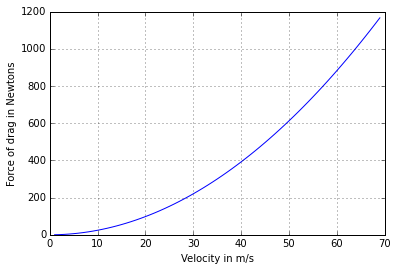

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Magic command to make plots appear in the notebook
%matplotlib inline 

rho = 1.225  # Density of air
C = 0.4      # Drag coefficient
A = 1.0      # Area

# Plot the force of drag as a function of velocity
v = np.arange(1,70) # Generate a range of velocities
Fd = 0.5*C*rho*A*v**2 # Calculate the force of drag

#Plot velocity vs. drag
plt.plot(v,Fd)
plt.xlabel('Velocity in m/s')
plt.ylabel('Force of drag in Newtons')
plt.grid()
plt.show()

Recall that we calculated that for someone who weighs 85 kilograms (187 lbs) the force of gravity was 834 Newtons. We see from our graph that the corresponding terminal velocity is about 58 m/s.  1 m/s = 2.23694 mph, so...

In [7]:
# Find the terminal velocity on Earth in mph
velocity = 58 * 2.23694
print(velocity)

129.74252


Crashing into the ground at that speed does sound terminal, though there are [survivor stories.](http://www.guinnessworldrecords.com/world-records/highest-fall-survived-without-parachute/)

### But what about on Mars?
For a skydiver on Mars with a faulty parachute there is good news and bads news?  Which to you want first?  Okay, here's the good new.  The weak gravity mean you will accelate at a slower rate.  The bad news?  The atmosphere is a lot thinner so there is less drag to slow you down.  So what would be your terminal velocity on Mars?

### Your Task
Redo do the calculation and plot above using force of Martian gravity on an 85 kilogram person, and an atmospheric density of 1/100th of the Earth's.